# Polynomial Regression

bu notbook overfitting-underfitting konularini daha iyi anlamak icin olusturulmustur

Types of polinomials

y = b0 + b1x

y = b0 + b1x + b2x^2

y = b0 + b1x + b2x^2 + b3x^3

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data =np.array([[2,3,4]])
data

array([[2, 3, 4]])

In [4]:
print(data)

[[2 3 4]]


In [5]:
# data yi 2. dereceden Polynomial features ekleyecegiz

trans = PolynomialFeatures(degree=2, include_bias=False) 

# b0 i modele dahil etmemek icin include_bias i kullnadik. ki cok komplex olusmasin 

In [6]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [7]:
trans.transform(data)

# trans.transform(data) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2 bu şekilde 
# 2.dereceye çevirdi transform işlemi tamamladı.

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [8]:
# hem transform hem de fit islemini ayni anda yapmak icin 

trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [9]:
# degree = 3 olsaydı reger;
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

## Read Dataset

In [10]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynimial Converter
 
datasetinin feature sayisini artirmak icin Polynomial Feature fonksiyonunu kullanilmali

In [11]:
X = df.drop("sales", axis=1)
y = df.sales

In [12]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [13]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [14]:
poly_features = poly_conv.transform(X) # polynomial features urettik

In [15]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
poly_features.shape  # satir sayisi ayni 200, feature sayisi 3 ten 9 a cikti

(200, 9)

In [17]:
pd.DataFrame(poly_features, columns=["TV", "radio", "newspaper", "tv^2", "tv&rasio", \
                                    "tv&newspaper", "radio^2", "radio&newspaper", "newspaper^2"]).head()

,TV,radio,newspaper,tv^2,tv&rasio,tv&newspaper,radio^2,radio&newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


# Train | Test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Model fitting

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model_poly = LinearRegression()

In [22]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model_poly.predict(X_test)

In [24]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


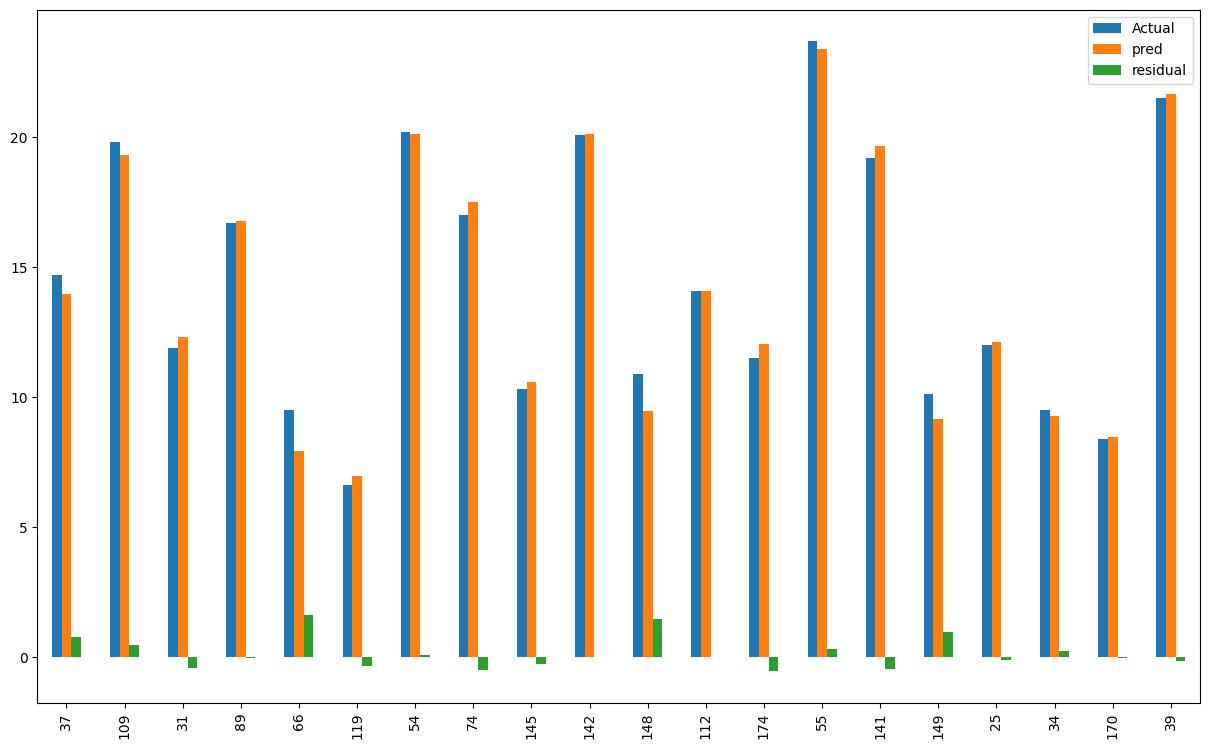

In [25]:
compare.head(20).plot(kind="bar", figsize=(15,9));

## Polynomial Coefficients - katsayilar

In [26]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [27]:
model_poly.intercept_

5.12555742313269

In [28]:
# coef lari Df haline getirelim feature lar ile eslestirelim

df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [29]:
ilk satiri manuel olarak prediction satirina koyalim 

model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

SyntaxError: invalid syntax (4227858687.py, line 1)

## Evaluation on the Test Set

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
y_pred = model_poly.predict(X_test)

ValueError: X has 55 features, but LinearRegression is expecting 9 features as input.

In [41]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [45]:
eval_metric(y_test, y_pred) # Test kisminin degerleri

Model testing performance:
--------------------------
R2_score 	: 0.9843529333146795
MAE 		: 0.48967980448035886
MSE 		: 0.44175055104033895
RMSE 		: 0.6646431757269


In [46]:
y_train_pred = model_poly.predict(X_train)

ValueError: X has 55 features, but LinearRegression is expecting 9 features as input.

In [47]:
eval_metric(y_train, y_train_pred)

NameError: name 'y_train_pred' is not defined

# Find an Optimum Polynomial Degree

In [48]:
# RMSE degerine göre optimum dereceye karar verecegiz

def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        number_of_features.append(poly_features.shape[1])
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features},
                        index=range(1,d))

In [49]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,1.734594,1.516152,3
2,0.587957,0.664643,9
3,0.433934,0.580329,19
4,0.351708,0.507774,34
5,0.250934,2.575819,55
6,0.193998,4.319765,83
7,5.421983,1378.531526,119
8,0.151955,3090.516288,164
9,0.171815,96216.916418,219


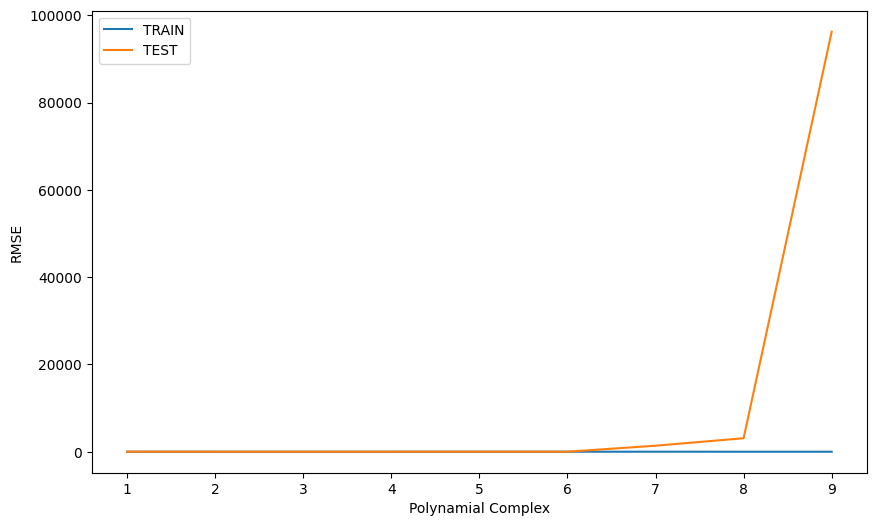

In [50]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

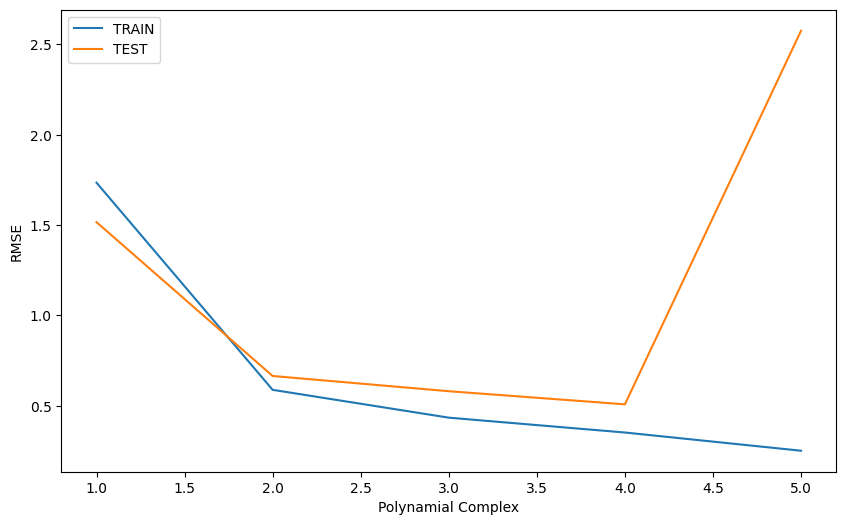

In [51]:
# grafige biraz daha yakindan bakmak icin

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

5 Overfitting Uygulama Denemesi

Overfitting in yukaridaki grafikte basladigi nokta olan 5. dereceyi esas alarak feature üretelim, bilebile overfitting olusumunu izleyelim

In [31]:
over_poly_converter = PolynomialFeatures(degree=5, include_bias=False)

# 5.dereceden polynomial feature üretiyoruz

In [37]:
over_model = LinearRegression()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X),
                                                    y, test_size=0.3, random_state=101)

In [38]:
over_model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred_over = over_model.predict(X_test)

In [52]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.7649898339135321
MAE 		: 0.6659602168230149
MSE 		: 6.634845524508155
RMSE 		: 2.575819388953378


In [53]:
# train skorlarina bakalim
y_train_over = over_model.predict(X_train)

In [54]:
eval_metric(y_train, y_train_over)

Model testing performance:
--------------------------
R2_score 	: 0.9976072485191096
MAE 		: 0.1862116912564833
MSE 		: 0.06296801909174883
RMSE 		: 0.2509342923789987


train R2 si olan 0.99 ile test R2 si olan 0.76 arasinda ciddi bir fark var. Bu fark bize overfitting i gösterdi. train setin skorlari cok iyi olmasina ragmen test setinin kötü oldugu icin overfitting teshisi konuldu

5.1 Underfitting

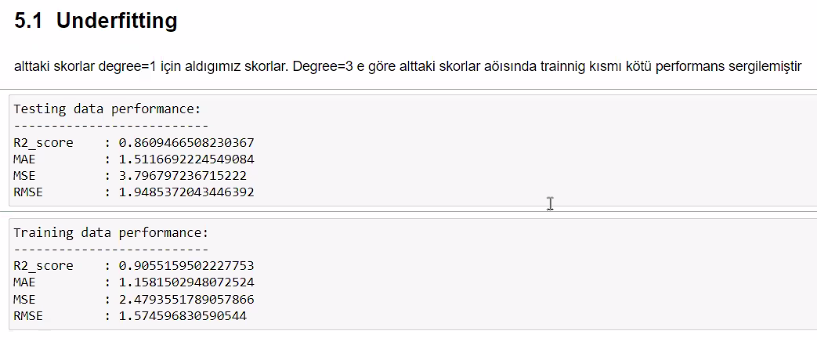